#### Exercise 8.2 (Page 5) 

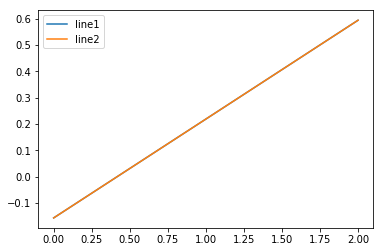

In [2]:
import matplotlib.pyplot as plt
import numpy as np
w = np.array([1.2, -3.2])
b = -0.5
w1 = w / 0.5
b1 = b / 0.5

x = np.array([0, 2])
y = - (w[0] * x + b) / w[1]
y1 = -(w1[0] * x + b1) / w1[1]

plt.plot(x, y, label='line1')
plt.plot(x, y1, label='line2')
plt.legend()
plt.show()

#### Exercise 8.6 (Page 12)

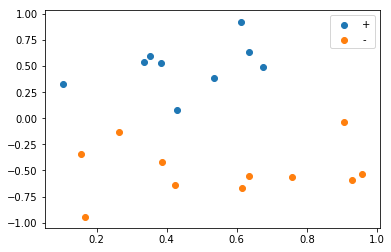

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings("ignore")

####(a)
####作图
N = 20
x1 = np.random.uniform(0, 1, N)
x2 = np.random.uniform(-1, 1, N)
X = np.c_[x1, x2]
y = np.sign(x2)

plt.scatter(x1[y>0], x2[y>0], label="+")
plt.scatter(x1[y<0], x2[y<0], label="-")
plt.legend()
plt.show()

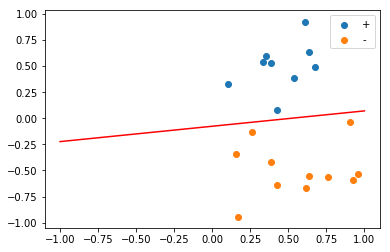

margin = 0.09612367161991067


In [17]:
####训练数据
clf = svm.SVC(kernel ='linear', C=1e10)
clf.fit(X, y)

#获得超平面
w = clf.coef_[0]
b = clf.intercept_[0]

#作图
m = np.array([-1, 1])
n = - (b + w[0] * m) / w[1]
plt.scatter(x1[y>0], x2[y>0], label="+")
plt.scatter(x1[y<0], x2[y<0], label="-")
plt.plot(m, n, 'r')
plt.legend()
plt.show()

#计算margin
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print("margin =",margin)

In [18]:
#计算Eout
def Eout(w, b, N=10000):
    x1 = np.random.uniform(0, 1, N)
    x2 = np.random.uniform(-1, 1, N)
    X = np.c_[x1, x2]
    y = np.sign(x2)
    y1 = np.sign(X.dot(w) + b)
    return np.mean(y != y1)

e = Eout(w, b)
print(e)

0.0183


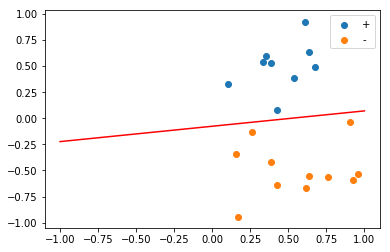

In [19]:
####(c)
clf = Perceptron()
clf.fit(X, y)

w1 = clf.coef_[0]
b1 = clf.intercept_[0]

#作图
m1 = np.array([-1, 1])
n1 = - (b + w[0] * m1) / w[1]
plt.scatter(x1[y>0], x2[y>0], label="+")
plt.scatter(x1[y<0], x2[y<0], label="-")
plt.plot(m1, n1, 'r')
plt.legend()
plt.show()

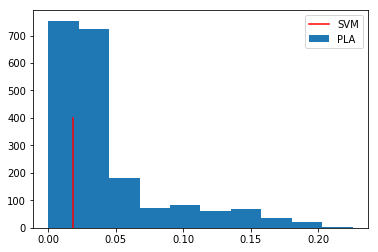

In [20]:
#多次实验，做直方图
result = np.array([])
for i in range(2000):
    np.random.shuffle(X)
    y = np.sign(X[:,1])
    clf.fit(X, y)
    w1 = clf.coef_[0]
    b1 = clf.intercept_[0]
    result = np.append(result,Eout(w1,b1))
    
plt.hist(result, label="PLA")
plt.plot([e] * 400, range(400), 'r', label="SVM")
plt.legend()
plt.show()

#### Exercise 8.17 (Page 45)

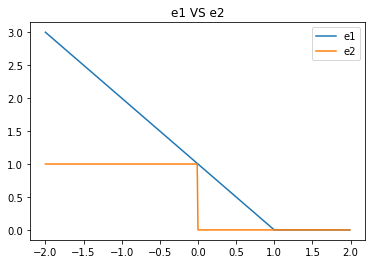

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def e1(t):
    return max(1 - t, 0)

def e2(t):
    if t >= 0:
        return 0
    else:
        return 1
    
x = np.arange(-2, 2, 0.01)
y1 = [e1(i) for i in x]
y2 = [e2(i) for i in x]

plt.plot(x, y1, label='e1')
plt.plot(x, y2, label='e2')
plt.legend()
plt.title('e1 VS e2')
plt.show()

#### Problem 8.5 (Page 47)

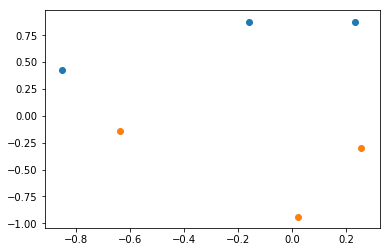

In [7]:
####a,b
def generate(n=3):
    """
    生成n个点
    """
    X1p = np.random.uniform(-1, 1, n)
    X2p = np.random.uniform(0, 1, n)
    X1n = np.random.uniform(-1, 1, n)
    X2n = np.random.uniform(-1, 0, n)

    return X1p, X2p, X1n, X2n

#生成数据
X1p, X2p, X1n, X2n = generate()
plt.scatter(X1p, X2p)
plt.scatter(X1n, X2n)
plt.show()

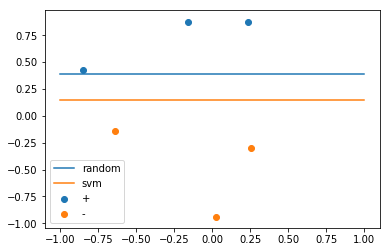

a_random = 0.3897481680806236
a_svm = 0.1437049653382313


In [8]:
#产生结果
def mysvm(X2p, X2n):
    """找到+1类中纵坐标最小的点，-1类中纵坐标最大的点"""
    return (np.min(X2p) + np.max(X2n)) / 2

a_random = np.random.uniform(-1, 1)
a_svm = mysvm(X2p, X2n)

plt.scatter(X1p, X2p, label="+")
plt.scatter(X1n, X2n, label="-")
plt.plot([-1, 1], [a_random, a_random], label="random")
plt.plot([-1, 1], [a_svm, a_svm], label="svm")
plt.legend()
plt.show()

print("a_random = {}".format(a_random))
print("a_svm = {}".format(a_svm))

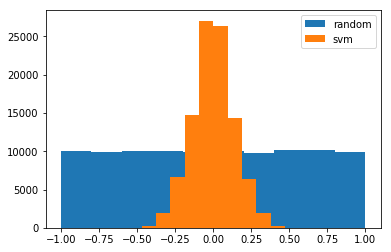

In [9]:
####c,d
N = 100000
A_random = []
A_svm = []
for i in range(N):
    X1p, X2p, X1n, X2n = generate()
    a_random = np.random.uniform(-1, 1)
    a_svm = mysvm(X2p, X2n)
    A_random.append(a_random)
    A_svm.append(a_svm)

#画直方图
plt.hist(A_random, label='random')
plt.hist(A_svm, label='svm')
plt.legend()
plt.show()

In [10]:
####e
#计算a_random_mean,a_svm_mean
#根据之前模拟的结果得到随机选择以及svm算法对应的系数
A_random = np.array(A_random)
A_svm = np.array(A_svm)
a_random_mean = np.mean(A_random)
a_svm_mean = np.mean(A_svm)
#生成用于模拟的数据
X2 = np.random.uniform(-1, 1, 100000)
#计算标签
Y = np.sign(X2)
Y_random_mean = np.sign(X2 - a_random_mean)
Y_svm_mean = np.sign(X2 - a_svm_mean)
#计算平均值
bias_random = np.mean(Y != Y_random_mean)
bias_svm = np.mean(Y != Y_svm_mean)
print("bias_random = {}".format(bias_random))
print("bias_svm = {}".format(bias_svm))

bias_random = 0.00038
bias_svm = 1e-05


In [11]:
#计算var_random_mean,var_svm
var_random = np.array([])
var_svm = np.array([])
for i in range(1000):
    #生成数据
    X1p, X2p, X1n, X2n = generate()
    #计算随机选择以及svm算法对应的系数
    a_random = np.random.uniform(-1, 1)
    a_svm = mysvm(X2p, X2n)
    #生成用于模拟的数据
    X2 = np.random.uniform(-1, 1, 1000)
    #计算标签
    Y_random = np.sign(X2 - a_random)
    Y_svm = np.sign(X2 - a_svm)
    #计算平均值
    Y_random_mean = np.sign(X2 - a_random_mean)
    Y_svm_mean = np.sign(X2 - a_svm_mean)
    #计算样本方差
    var_random = np.append(var_random, np.mean(Y_random_mean != Y_random))
    var_svm = np.append(var_svm, np.mean(Y_svm_mean != Y_svm))
    
print("var_svm = {}".format(np.mean(var_svm)))
print("var_random = {}".format(np.mean(var_random)))

var_svm = 0.05110900000000001
var_random = 0.250094


#### Problem 8.13 (Page 50)

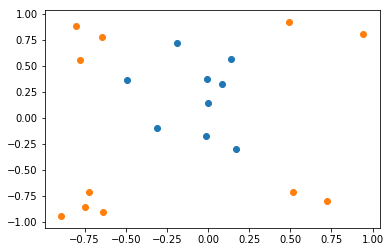

In [12]:
import numpy as np
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from numpy.linalg import inv

####(a)
#题目中的数据
X = np.array([(-0.494, 0.363), (-0.311, -0.101), (-0.0064, 0.374), (-0.0089, -0.173),
              (0.0014, 0.138), (-0.189, 0.718), (0.085, 0.32208), (0.171, -0.302), (0.142, 0.568),
              (0.491, 0.920), (-0.892, -0.946), (-0.721, -0.710), (0.519, -0.715),
              (-0.775, 0.551), (-0.646, 0.773), (-0.803, 0.878), (0.944, 0.801),
              (0.724, -0.795), (-0.748, -0.853), (-0.635, -0.905)])
#对应标签
y = np.array([1] * 9 + [-1] * 11)

#作图
x1p = X[y>0][:,0]
x2p = X[y>0][:,1]
x1n = X[y<0][:,0]
x2n = X[y<0][:,1]

plt.scatter(x1p, x2p)
plt.scatter(x1n, x2n)
plt.show()

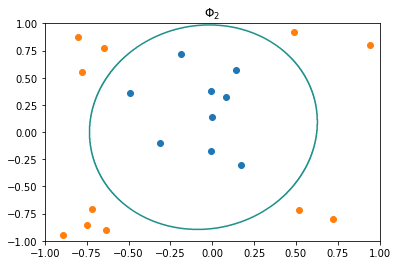

In [13]:
#二次转换
def contour(X1, X2, clf, poly):
    """
    计算每个点的标签
    """
    X = np.c_[X1.ravel(), X2.ravel()]
    X_poly = poly.fit_transform(X)
    label = clf.predict(X_poly)
    label = label.reshape(X1.shape)
    
    return label

poly2 = PolynomialFeatures(2)
X_poly2 = poly2.fit_transform(X)

clf = svm.SVC(kernel="linear", C=1e10)
clf.fit(X_poly2, y)

#点的数量
n = 1000
r = 1

#作点
a = np.linspace(-r, r, n)
b = np.linspace(-r, r, n)

#构造网格
A, B = np.meshgrid(a, b)
C = contour(A, B, clf, poly2)

#绘制等高线
plt.contour(A, B, C, 0)
plt.scatter(x1p, x2p)
plt.scatter(x1n, x2n)
plt.title('$\Phi_2$')
plt.show()

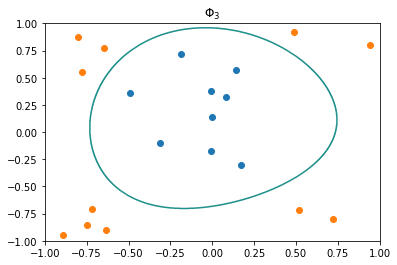

In [14]:
#三次转换
poly3 = PolynomialFeatures(3)
X_poly3 = poly3.fit_transform(X)

clf = svm.SVC(kernel="linear", C=1e10)
clf.fit(X_poly3, y)

#构造网格
A, B = np.meshgrid(a, b)
C = contour(A, B, clf, poly3)

#绘制等高线
plt.contour(A, B, C, 0)
plt.scatter(x1p, x2p)
plt.scatter(x1n, x2n)
plt.title('$\Phi_3$')
plt.show()

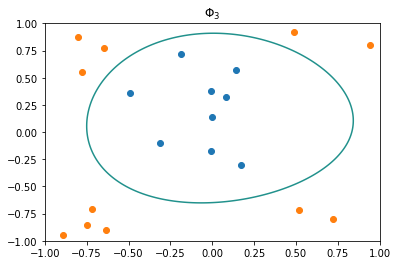

In [15]:
####(c)
Lambda = 1
n, d = X_poly3.shape
w = inv(X_poly3.T.dot(X_poly3) + Lambda * np.eye(d)).dot(X_poly3.T.dot(y))

label = poly3.fit_transform(np.c_[A.ravel(), B.ravel()]).dot(w)
C = label.reshape(A.shape)

plt.contour(A, B, C, 0)
plt.scatter(x1p, x2p)
plt.scatter(x1n, x2n)
plt.title('$\Phi_3$')
plt.show()